In [2]:
#import dependencies and Python SQL toolkit and Object Relational Mapper


%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt
import re, string

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


# Reflect Tables into SQLAlchemy ORM

In [3]:
# create engine associate to sqlite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [8]:
# make a flattened list of all measurement dates and precipitation measurment
results = session.query(Measurement.prcp, Measurement.date).all()
all_dates_prcp = list(np.ravel(results))
all_dates_prcp

[0.08,
 '2010-01-01',
 0.0,
 '2010-01-02',
 0.0,
 '2010-01-03',
 0.0,
 '2010-01-04',
 None,
 '2010-01-06',
 0.06,
 '2010-01-07',
 0.0,
 '2010-01-08',
 0.0,
 '2010-01-09',
 0.0,
 '2010-01-10',
 0.01,
 '2010-01-11',
 0.0,
 '2010-01-12',
 0.0,
 '2010-01-14',
 0.0,
 '2010-01-15',
 0.0,
 '2010-01-16',
 0.0,
 '2010-01-17',
 0.0,
 '2010-01-18',
 0.0,
 '2010-01-19',
 0.0,
 '2010-01-20',
 0.0,
 '2010-01-21',
 0.0,
 '2010-01-22',
 0.0,
 '2010-01-23',
 0.01,
 '2010-01-24',
 0.0,
 '2010-01-25',
 0.04,
 '2010-01-26',
 0.12,
 '2010-01-27',
 0.0,
 '2010-01-28',
 None,
 '2010-01-30',
 0.03,
 '2010-01-31',
 0.01,
 '2010-02-01',
 None,
 '2010-02-03',
 0.01,
 '2010-02-04',
 0.0,
 '2010-02-05',
 0.0,
 '2010-02-06',
 0.0,
 '2010-02-07',
 0.0,
 '2010-02-08',
 0.0,
 '2010-02-09',
 0.0,
 '2010-02-11',
 0.02,
 '2010-02-12',
 0.01,
 '2010-02-13',
 0.0,
 '2010-02-14',
 0.0,
 '2010-02-15',
 0.0,
 '2010-02-16',
 0.0,
 '2010-02-17',
 None,
 '2010-02-19',
 0.03,
 '2010-02-20',
 0.0,
 '2010-02-21',
 0.0,
 '2010-02-22

In [10]:
# find the last date for which the database has a value and convert into a string with desired format
last_date = session.query(func.max(Measurement.date)).all()
last_date_str = re.sub(r'\D', '', str(last_date))
last_date_str



'20170823'

In [12]:
# convert date string back into datetime object
last_date_frmt = dt.datetime.strptime(last_date_str, "%Y%m%d")

In [13]:
# Calculate the date 1 year ago from the last data point in the database
query_date = last_date_frmt - dt.timedelta(days=365)
query_date, print(query_date)

2016-08-23 00:00:00


(datetime.datetime(2016, 8, 23, 0, 0), None)

In [53]:
# Perform a query to retrieve the date and precipitation scores starting from the query date

prec_rslt = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).\
    all()


In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column

date = [rslt[0] for rslt in prec_rslt]
prec = [rslt[1] for rslt in prec_rslt]

prec_df = pd.DataFrame(prec_rslt, columns=['Date', 'Precipiation Score'])
prec_df.set_index('Date', inplace=True, )
prec_df.head()

,Precipiation Score
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [16]:
# Sort the dataframe by date

prec_df.sort_values("Date").head()

,Precipiation Score
Date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


In [17]:
# define an x-axis in a way that pandas plot and matplotlib can use
x_axis = np.arange(len(date))
x_axis

array([   0,    1,    2, ..., 2220, 2221, 2222])

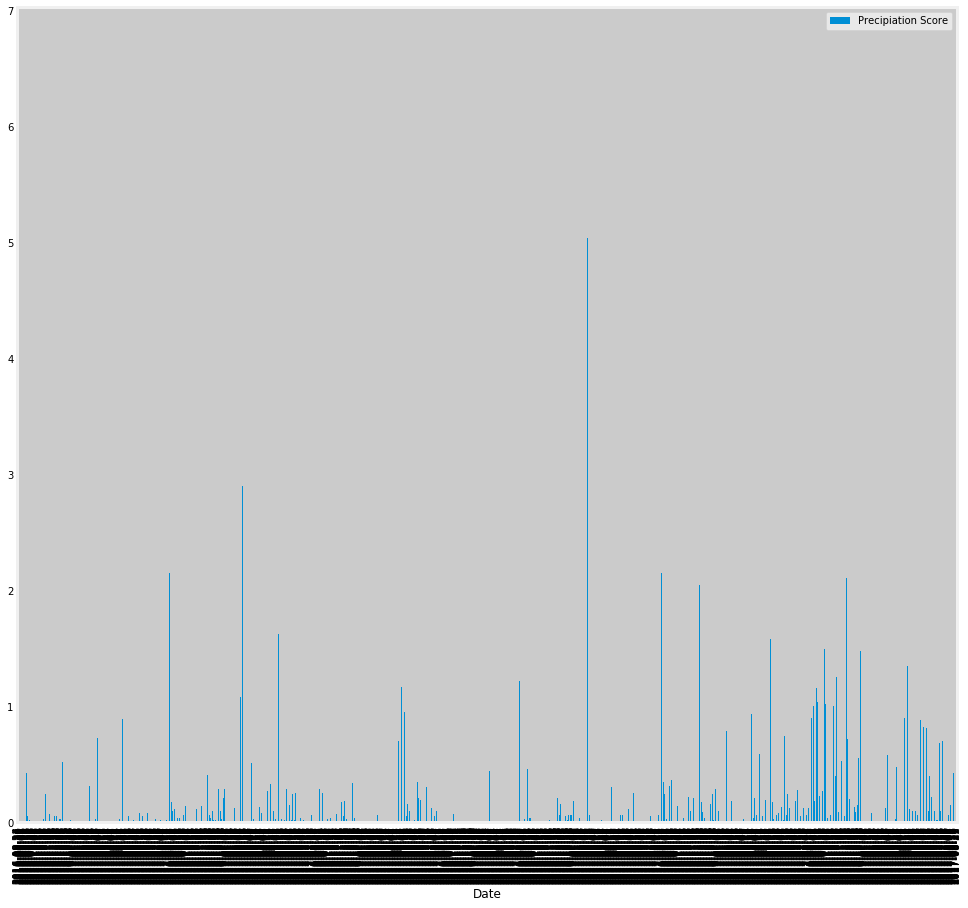

In [56]:

# Use Pandas Plotting with Matplotlib to plot the data

prec_df.plot(kind='bar', figsize=(15,15))


![precipitation](Images/precipitation.png)

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe()

,Precipiation Score
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [20]:
# Display all stations by station
session.query(Station.station).all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [21]:
# Design a query to show how many stations are available in this dataset?
sttn_count = session.query(func.count(Station.station)).all()
sttn_count

[(9)]

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

act_sttn = session.query(Station.station, func.count(Measurement.station)).\
    filter(Station.station == Measurement.station).\
    group_by(Station.name).\
    order_by(func.count(Measurement.station).desc()).\
    all()
act_sttn

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


min_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
max_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
min_temp, max_temp, avg_temp

([(54.0)], [(85.0)], [(71.66378066378067)])

In [25]:
# query and display all dates and temperatures from the most active station beginning at query date
act_temp_rslt = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= query_date).\
    filter(Measurement.station == 'USC00519281').\
    all()
act_temp_rslt    

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [26]:
# create a Data Frame from the results of the previous query
act_date = [rslt[0] for rslt in act_temp_rslt]
act_prec = [rslt[1] for rslt in act_temp_rslt]

temp_df = pd.DataFrame(act_temp_rslt, columns=['Date', 'Temp Observation'])
temp_df.set_index('Date', inplace=True, )
temp_df.head()

,Temp Observation
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


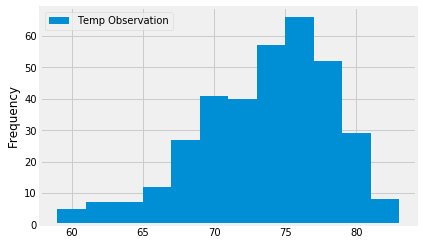

In [27]:
#plot histogram of frequency of temperature observations for last year from the most active station 
temp_df.plot(kind="hist", bins=12)

In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [60]:
# test calc_temps function for query date and last date in data
print(calc_temps(query_date, last_date_frmt))


[(58.0, 74.57894736842105, 87.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates
trip_temps = calc_temps('2011-02-28', '2011-03-05')
print(trip_temps)

[(61.0, 69.75510204081633, 75.0)]


In [32]:
#create Data Frame from trip temps
trip_df = pd.DataFrame(trip_temps, columns=['Min', 'Avg', 'Max'])
trip_df

,Min,Avg,Max
0,61.0,69.755102,75.0


In [34]:
# cast data as float in order to be able to do math properly

mini = float(trip_df.iloc[0,0])
maxi = float(trip_df.iloc[0,2])
avgi = float(trip_df.iloc[0,1])

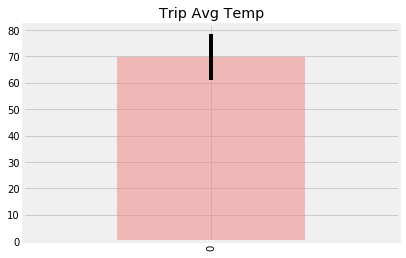

In [35]:
#determine error bars and plot trip avg temp with error bar
errors = [[avgi-mini], [maxi-avgi]]
trip_df['Avg'].plot(kind='bar', color='lightcoral', alpha=.5, yerr=errors, title='Trip Avg Temp')


In [36]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [37]:
# query station, name, lat, lng, elevation, and avg precipation, group by station name, and order by avg precipation descending
sttn_temp = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.avg(Measurement.prcp)).\
    filter(Station.station == Measurement.station).\
    filter(Measurement.date >= '2011-02-28', Measurement.date <= '2011-03-05').\
    group_by(Station.name).\
    order_by(func.avg(Measurement.prcp).desc()).\
    all()
sttn_temp

[('USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6,
  0.5825),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.392),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.37166666666666665),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.365),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.24166666666666667),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.24),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  0.22999999999999998),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  0.126),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

In [38]:
#create data frame 
sttn_temp_df = pd.DataFrame(sttn_temp, columns=['Station', 'Name', 'Lat', 'Lng', 'Elev', 'Avg Prcp'])
sttn_temp_df

,Station,Name,Lat,Lng,Elev,Avg Prcp
0,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,0.582500
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.392000
2,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.371667
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.365000
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.241667
5,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.240000
6,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.230000
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,0.126000
8,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


In [39]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [40]:
#https://stackoverflow.com/questions/7274267/print-all-day-dates-between-two-dates/7274316
# make a list of dates between a start and end using datetime objects
from datetime import date, timedelta

start = date(2011, 2, 28) 
end = date(2011, 3, 5)
delta = end - start
for i in range(delta.days + 1):
    print(start + timedelta(i))
    
dates = [start + timedelta(x) for x in range(delta.days +1)]
dates



2011-02-28
2011-03-01
2011-03-02
2011-03-03
2011-03-04
2011-03-05


[datetime.date(2011, 2, 28),
 datetime.date(2011, 3, 1),
 datetime.date(2011, 3, 2),
 datetime.date(2011, 3, 3),
 datetime.date(2011, 3, 4),
 datetime.date(2011, 3, 5)]

In [41]:
# test date.day and date.month and then cast as string into list of list of dates
for date in dates:
    print(date.month, date.day)
trip_dates = [[str(date.month), str(date.day)] for date in dates]
trip_dates

2 28
3 1
3 2
3 3
3 4
3 5


[['2', '28'], ['3', '1'], ['3', '2'], ['3', '3'], ['3', '4'], ['3', '5']]

In [42]:
# join each item in list of list with a hyphen to format correctly for use in pre-defined daily_normals function
trip_days = [['-'.join(date)] for date in trip_dates]
trip_days

[['2-28'], ['3-1'], ['3-2'], ['3-3'], ['3-4'], ['3-5']]

In [62]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals('01-01')

[(62.0, 69.15384615384616, 77.0)]

In [61]:
#test daily_normals function, flattening result using np.ravel
np.ravel(daily_normals("01-01"))

array([62.        , 69.15384615, 77.        ])

In [44]:
# use list slices/indexing to correctly extract data
daily_normals('01-01')[0][1]

69.15384615384616

In [45]:
# use datetime string from time to create a list of date strings from list of date objects from desired trip date range
dobjs = [date.strftime('%m-%d') for date in dates]
dobjs

['02-28', '03-01', '03-02', '03-03', '03-04', '03-05']

In [46]:
# succesfully create dataframe of trip normals from desired trip date range list using iterrows to directly write into data frame initialized using dictionary of dates from date list
trip_norm = {'Date': dobjs}
trip_norm_df = pd.DataFrame.from_dict(trip_norm)
for index, row in trip_norm_df.iterrows():
    trip_norm_df.loc[index, 'Min'] = daily_normals(row['Date'])[0][0]
    trip_norm_df.loc[index, 'Avg'] = daily_normals(row['Date'])[0][1]
    trip_norm_df.loc[index, 'Max'] = daily_normals(row['Date'])[0][2]
trip_norm_df


,Date,Min,Avg,Max
0,02-28,65.0,70.655172,80.0
1,03-01,64.0,70.032787,76.0
2,03-02,61.0,70.366667,78.0
3,03-03,60.0,70.068966,78.0
4,03-04,57.0,69.272727,77.0
5,03-05,60.0,67.890909,76.0


In [64]:
#create a list of trip normals using list comprehension of daily_normals function and list of range of desired dates
trip_normals = [daily_normals(date) for date in dobjs]
trip_normals[1]

[(64.0, 70.0327868852459, 76.0)]

In [65]:
# attempt using ravel to flatten list of normals loses a necessary dimension
np.ravel(trip_normals)

array([65.        , 70.65517241, 80.        , 64.        , 70.03278689,
       76.        , 61.        , 70.36666667, 78.        , 60.        ,
       70.06896552, 78.        , 57.        , 69.27272727, 77.        ,
       60.        , 67.89090909, 76.        ])

In [66]:
#using correct list slices enabled me to be able to use list comprehension to flatten trip_normals into desired columns

trip_mins = [v[0][0] for v in trip_normals]
trip_avgs = [v[0][1] for v in trip_normals]
trip_maxs = [v[0][2] for v in trip_normals]
trip_mins, trip_maxs, trip_avgs

([65.0, 64.0, 61.0, 60.0, 57.0, 60.0],
 [80.0, 76.0, 78.0, 78.0, 77.0, 76.0],
 [70.65517241379311,
  70.0327868852459,
  70.36666666666666,
  70.06896551724138,
  69.27272727272727,
  67.89090909090909])

In [67]:
# https://stackoverflow.com/questions/50467297/list-of-list-of-tuples-to-pandas-dataframe
# using double list comprehensions to try and unpack trip_normals created an odditiy in how the data was loaded into Data Frame
trip_nrm_df = pd.DataFrame([[y[0] for y in x] for x in trip_normals],
                           columns=['Min'])

trip_nrm_df['Avg'] = [[y[1] for y in x] for x in trip_normals]
trip_nrm_df['Max'] = [[y[2] for y in x] for x in trip_normals]
trip_nrm_df

,Min,Avg,Max
0,65.0,[70.65517241379311],[80.0]
1,64.0,[70.0327868852459],[76.0]
2,61.0,[70.36666666666666],[78.0]
3,60.0,[70.06896551724138],[78.0]
4,57.0,[69.27272727272727],[77.0]
5,60.0,[67.89090909090909],[76.0]


In [68]:
#trying to load data directy into a Data Frame from double list comprehension also produced an unexlained anomaly
trip_nrm_df = pd.DataFrame([[y[0] for y in x] for x in trip_normals], 
                           [[y[1] for y in x] for x in trip_normals], 
                           [[y[2] for y in x] for x in trip_normals],
                           columns=['Min', 'Avg', 'Max'])
trip_nrm_df

TypeError: __init__() got multiple values for argument 'columns'

In [69]:
#successfuly created the Data Frame a second time using lists derived from array index slicing
tryp_norm = {'Date': dobjs, 'Min': trip_mins, 'Avg': trip_avgs, 'Max': trip_maxs}
tryp_norm_df = pd.DataFrame.from_dict(tryp_norm)
tryp_norm_df

,Date,Min,Avg,Max
0,02-28,65.0,70.655172,80.0
1,03-01,64.0,70.032787,76.0
2,03-02,61.0,70.366667,78.0
3,03-03,60.0,70.068966,78.0
4,03-04,57.0,69.272727,77.0
5,03-05,60.0,67.890909,76.0


In [70]:
# attempt to create a data frame using trip_normals array
trip_nrm_df = pd.DataFrame(trip_normals, columns=['Date'])
trip_nrm_df

,Date
0,"(65.0, 70.65517241379311, 80.0)"
1,"(64.0, 70.0327868852459, 76.0)"
2,"(61.0, 70.36666666666666, 78.0)"
3,"(60.0, 70.06896551724138, 78.0)"
4,"(57.0, 69.27272727272727, 77.0)"
5,"(60.0, 67.89090909090909, 76.0)"


In [71]:
#similar error as a few cells back when trying to create a data frame from several lists and name columns
trip_nrm_df = pd.DataFrame(dobjs, trip_mins, trip_avgs, trip_maxs, columns=['Date', 'Min', 'Avg', 'Max'])
trip_nrm_df

TypeError: __init__() got multiple values for argument 'columns'

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


[Text(0,0,'02-28'),
 Text(0,0,'03-01'),
 Text(0,0,'03-02'),
 Text(0,0,'03-03'),
 Text(0,0,'03-04'),
 Text(0,0,'03-05')]

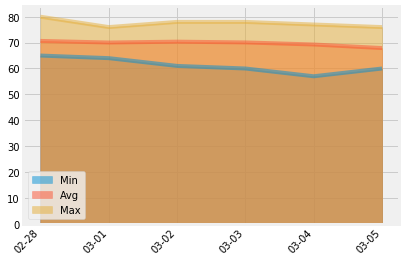

In [72]:
# Plot the daily normals as an area plot with `stacked=False`
# https://stackoverflow.com/questions/26358200/xticks-by-pandas-plot-rename-with-the-string
# had to explplicitly reset xticks because otherwise xticklabels were missing one/offset by one
ax = tryp_norm_df.plot(kind='area', stacked=False)
ax.set_xticks(np.arange(len(dobjs)))
ax.set_xticklabels(tryp_norm_df['Date'], rotation=45, ha='right')